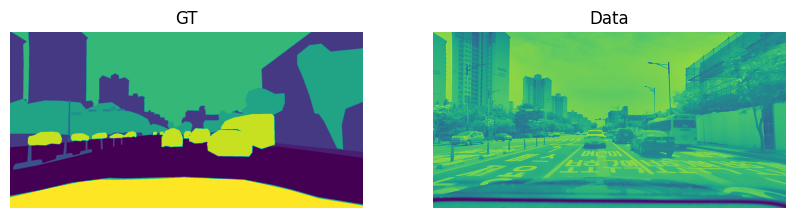

In [21]:
import os
import cv2
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

from tqdm import tqdm
import albumentations as A
from albumentations.pytorch import ToTensorV2

path = './data'

data_path = './data/train_source.csv'
train_source = pd.read_csv(data_path)         
df = pd.DataFrame(train_source)
# for idx in range(len(df)):
#     img_path = df.iloc[idx, 1]
#     mask_path = df.iloc[idx, 2]
#     image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
#     mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

#     mask[mask == 255] = 12 #배경을 픽셀값 12로 간주
#     mask = mask*21

idx = 10
img_path = os.path.join(path, df.iloc[idx, 1])
mask_path = os.path.join(path, df.iloc[idx, 2])
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

mask[mask == 255] = 12 #배경을 픽셀값 12로 간주
mask = mask*21

# 이미지 표시
plt.figure(figsize=(10, 5))  # 전체 그림 크기 설정
plt.subplot(1, 2, 1)  # 1x2 그리드에서 첫 번째 서브 플롯 선택
plt.imshow(mask)
plt.axis('off')  # 축 제거
plt.title('GT')  # 서브 플롯 제목 설정

plt.subplot(1, 2, 2)  # 1x2 그리드에서 두 번째 서브 플롯 선택
plt.imshow(image)
plt.axis('off')  # 축 제거
plt.title('Data')  # 서브 플롯 제목 설정

plt.show()

In [22]:
# NaN 값을 체크할 함수 정의
def has_nan(image):
    return np.isnan(image).any()

# NaN 값을 가진 이미지 파일 목록 저장할 리스트
images_with_nan = []
gt_with_nan = []

# 이미지 파일 순회
for idx in range(len(df)):
    # 이미지 로드
    img_path = os.path.join(path, df.iloc[idx, 1])
    mask_path = os.path.join(path, df.iloc[idx, 2])
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # NaN 값 체크
    if has_nan(image):
        images_with_nan.append(idx)
    if has_nan(mask):
        gt_with_nan.append(idx)

# NaN 값을 가진 이미지 파일 목록 출력
for image_file_with_nan in images_with_nan:
    print(f'NaN 값이 포함된 이미지: {image_file_with_nan}')
for gt_file_with_nan in gt_with_nan:
    print(f'NaN 값이 포함된 이미지: {gt_file_with_nan}')

# NaN 값을 가진 이미지 파일의 개수 출력
print(f'총 {len(images_with_nan)} 개의 이미지에 NaN 값이 포함되어 있습니다.')
print(f'총 {len(gt_with_nan)} 개의 이미지에 NaN 값이 포함되어 있습니다.')

총 0 개의 이미지에 NaN 값이 포함되어 있습니다.
총 0 개의 이미지에 NaN 값이 포함되어 있습니다.
